In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int6

In [5]:
df = df[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
df['Age'].fillna(df['Embarked'].mode()[0],inplace=True)
df.head()

C:\Users\dell\AppData\Local\Temp\ipykernel_27956\2744604394.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Embarked'].mode()[0],inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_27956\2744604394.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'S' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['Age'].fillna(df['Embarked'].mode()[0],inplace=True)
C:\Users\dell\AppDa

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
label = LabelEncoder()

df.loc[:, 'Sex'] = label.fit_transform(df['Sex'])
df.loc[:, 'Embarked'] = label.fit_transform(df['Embarked'])


In [12]:
df.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age          object
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

In [16]:
df_clean['Age'] = pd.to_numeric(df_clean['Age'], errors='coerce')


In [18]:
df[df['Age'] == 'S']


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,1,S,0,0,8.4583,1
17,1,2,1,S,0,0,13.0000,2
19,1,3,0,S,0,0,7.2250,0
26,0,3,1,S,0,0,7.2250,0
28,1,3,0,S,0,0,7.8792,1
...,...,...,...,...,...,...,...,...
859,0,3,1,S,0,0,7.2292,0
863,0,3,0,S,8,2,69.5500,2
868,0,3,1,S,0,0,9.5000,2
878,0,3,1,S,0,0,7.8958,2


In [19]:
df_clean['Age'] = pd.to_numeric(df_clean['Age'], errors='coerce')

In [21]:
print(df_clean['Age'].dtypes)
print(df_clean['Age'].unique()[:20])


float64
[22. 38. 26. 35. nan 54.  2. 27. 14.  4. 58. 20. 39. 55. 31. 34. 15. 28.
  8. 19.]


In [22]:
df_clean['Age'].fillna(df_clean['Age'].median(), inplace=True)


C:\Users\dell\AppData\Local\Temp\ipykernel_27956\1843709780.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Age'].fillna(df_clean['Age'].median(), inplace=True)


In [23]:
df_clean.dtypes


Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

In [25]:
x = df_clean.drop('Survived', axis=1)
y = df_clean['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [27]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(n_estimators=100,random_state = 42)

}

for name, model in models.items():
    model.fit(x_train,y_train)
    preds = model.predict(x_test)
    acc = accuracy_score(y_test,preds)
    print(f"{name}: {acc*100:.2f}%")

Logistic Regression: 81.01%
Random Forest: 82.68%


In [30]:
import seaborn as sns

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



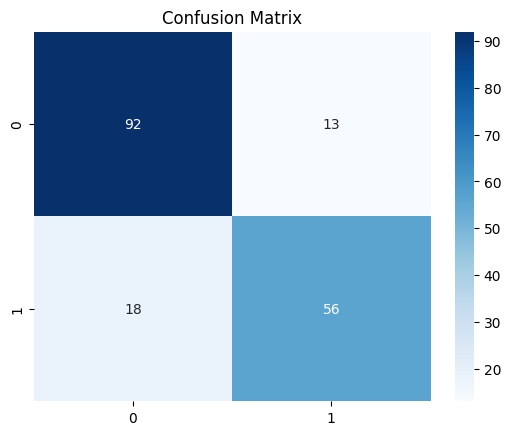

In [31]:
best_model = RandomForestClassifier(n_estimators = 100,random_state = 42)
best_model.fit(x_train,y_train)
y_pred = best_model.predict(x_test)

print(classification_report(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

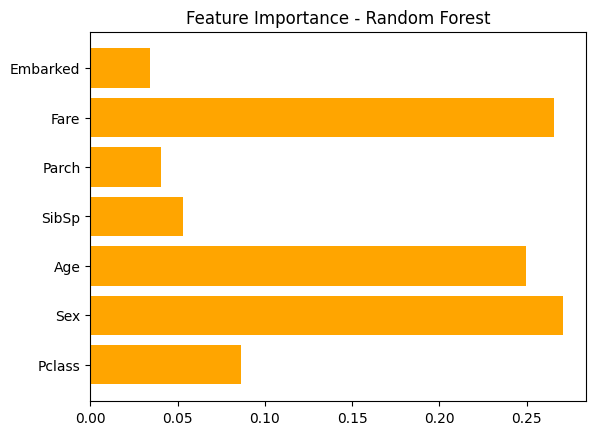

In [32]:
importance = best_model.feature_importances_
plt.barh(X.columns, importance, color='orange')
plt.title("Feature Importance - Random Forest")
plt.show()
